In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['INFY.NS', 'TECHM.NS', 'TCS.NS', 'HCLTECH.NS', 'BHARTIARTL.NS']
tech = ['INFY', 'TECHM', 'TCS', 'HCLTECH', 'BHARTIARTL']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock, df in zip(tech_list, tech):   
    # Set DataFrame as the Stock Ticker
    globals()[df] = DataReader(stock, 'yahoo', start, end)

In [ ]:
company_list = [INFY, TECHM, TCS, HCLTECH, BHARTIARTL]
company_name = ["INFY.NS", "TECHM.NS", "TCS.NS", "HCLTECH.NS", "BHARTIARTL.NS"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-06-05,711.700012,700.599976,707.000000,703.549988,7718679.0,688.641296,INFY.NS
2020-06-08,725.799988,704.000000,707.650024,720.849976,10719105.0,705.574646,INFY.NS
2020-06-09,729.599976,715.049988,720.000000,717.599976,10078029.0,702.393494,INFY.NS
2020-06-10,719.450012,709.200012,715.000000,715.849976,7263049.0,700.680603,INFY.NS
2020-06-11,713.400024,700.250000,712.000000,703.950012,8825715.0,689.032776,INFY.NS
2020-06-12,695.150024,675.500000,675.799988,692.049988,9795316.0,677.384949,INFY.NS
2020-06-15,704.400024,685.250000,693.000000,687.549988,7857344.0,672.980286,INFY.NS
2020-06-16,712.000000,699.150024,702.000000,701.200012,10131760.0,686.341064,INFY.NS
2020-06-17,710.299988,698.000000,699.900024,703.650024,7291916.0,688.739136,INFY.NS


In [ ]:
# Summary Stats
# AAPL.describe()
BHARTIARTL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-06-05,590.000000,567.450012,584.0,584.349976,47873027.0,582.259094,BHARTIARTL.NS
2020-06-08,593.700012,579.200012,588.0,585.150024,20429990.0,583.056274,BHARTIARTL.NS
2020-06-09,591.650024,565.700012,580.0,567.799988,14938972.0,565.768311,BHARTIARTL.NS
2020-06-10,576.000000,563.049988,571.0,567.099976,19130270.0,565.070801,BHARTIARTL.NS
2020-06-11,573.799988,546.700012,570.0,551.849976,27290666.0,549.875366,BHARTIARTL.NS


In [ ]:
# General info
INFY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-06-05 to 2021-06-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          250 non-null    float64
 1   Low           250 non-null    float64
 2   Open          250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    float64
 5   Adj Close     250 non-null    float64
 6   company_name  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.6+ KB


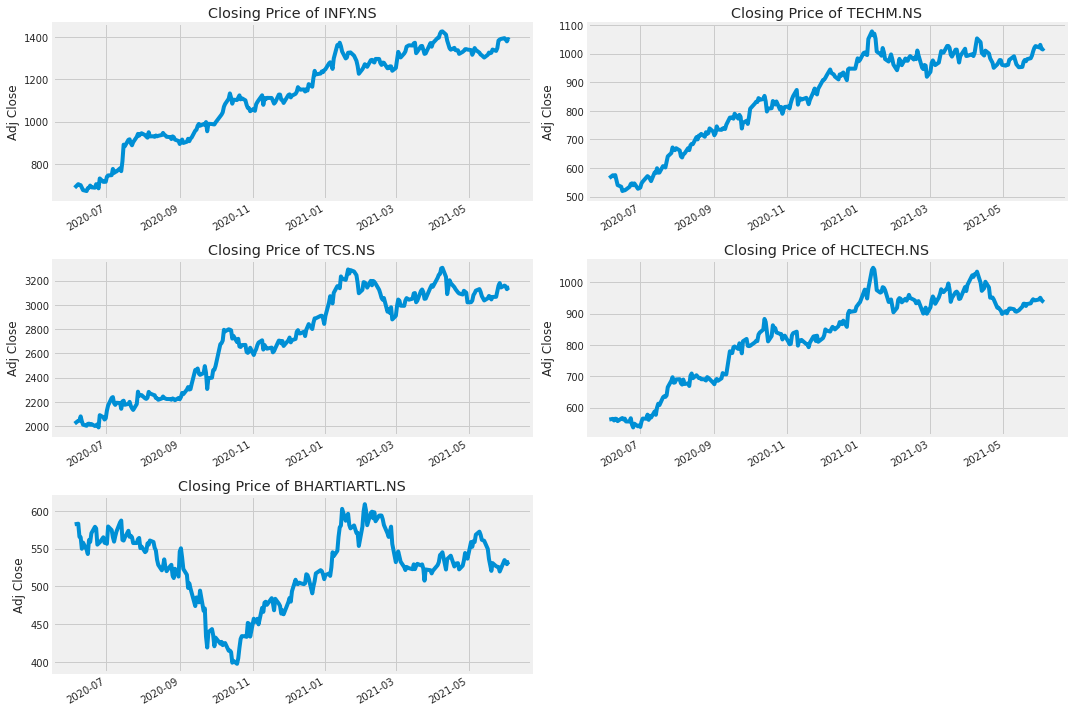

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

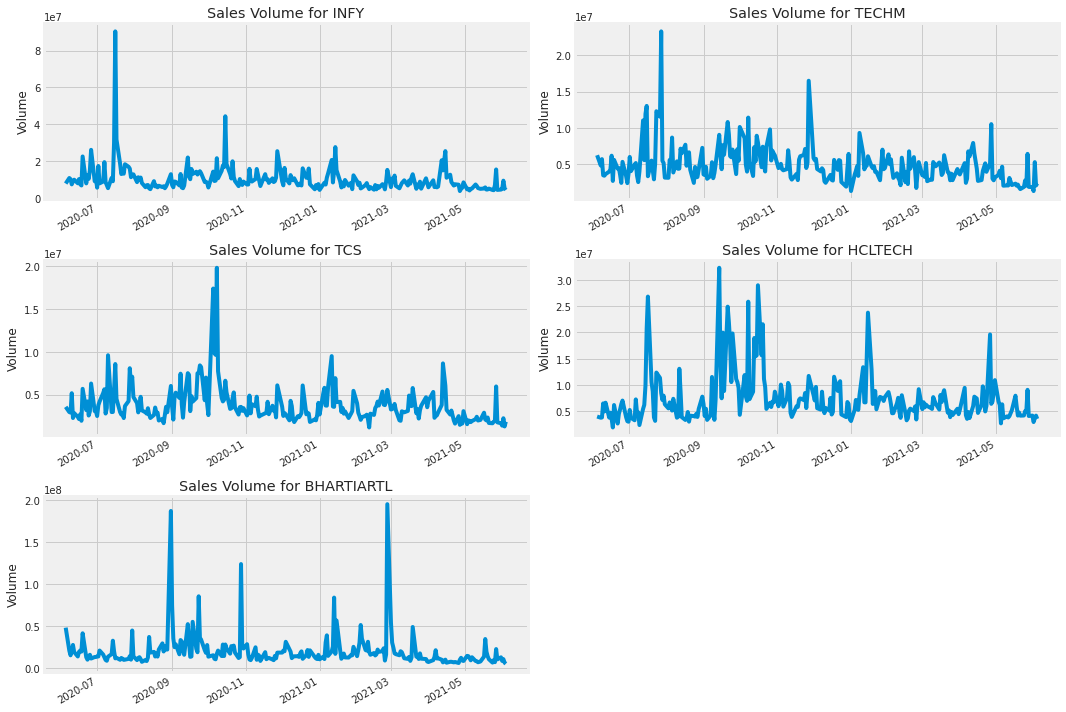

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech[i - 1]}")
    
plt.tight_layout()

In [ ]:
# ma_day = [9, 21, 200]
ma_day = [9, 21]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

<Figure size 3600x3600 with 0 Axes>

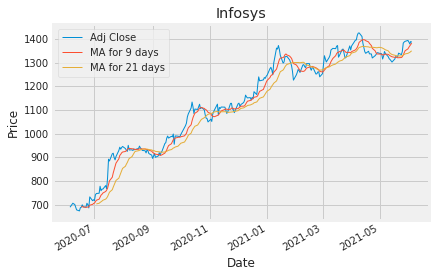

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=2)

# fig, axes = plt.subplots(nrows=1, ncols=1)
# fig.set_figheight(10)
# fig.set_figwidth(12)

plt.figure(figsize=(50,50))


# INFY[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 200 days']].plot(ax=axes[0,0])
# INFY[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(ax=axes[0,0])
INFY[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(linewidth = 1)


# TCS[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(ax=axes[0, 1])
# axes[0,1].set_title('TCS')

# TECHM[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(ax=axes[1, 0])
# axes[1, 0].set_title('Tech Mahindra')

# HCLTECH[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(ax=axes[1, 1])
# axes[1, 1].set_title('HCL Tech')

# BHARTIARTL[['Adj Close', 'MA for 9 days', 'MA for 21 days']].plot(ax=axes[2, 0])
# axes[2, 0].set_title('Bharti Airtel')

plt.plot(data = INFY[['Adj Close', 'MA for 9 days', 'MA for 21 days']])
plt.title('Infosys')
plt.ylabel('Price')
plt.savefig('books_read.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [ ]:
INFY.tail(5)

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 9 days,MA for 21 days
Date,,,,,,,,,
2021-05-31,1401.500000,1383.000000,1401.500000,1393.750000,4429904.0,1393.750000,INFY.NS,1357.989299,1339.273647
2021-06-01,1401.000000,1378.650024,1400.000000,1387.199951,4791325.0,1387.199951,INFY.NS,1365.153022,1341.526443
2021-06-02,1391.949951,1365.000000,1380.750000,1378.650024,9272276.0,1378.650024,INFY.NS,1371.113919,1343.480451
2021-06-03,1399.000000,1377.050049,1388.099976,1389.650024,5115645.0,1389.650024,INFY.NS,1376.626180,1347.025327
2021-06-04,1396.900024,1377.650024,1393.949951,1385.650024,4194328.0,1385.650024,INFY.NS,1382.403008,1349.809687


In [ ]:
import copy
INFY2DecisionTree = []
INFY2DecisionTree = copy.deepcopy(INFY)

TCS2DecisionTree = []
TCS2DecisionTree = copy.deepcopy(TCS)

TECHM2DecisionTree = []
TECHM2DecisionTree = copy.deepcopy(TECHM)

HCLTECH2DecisionTree = []
HCLTECH2DecisionTree = copy.deepcopy(HCLTECH)

BHARTIARTL2DecisionTree = []
BHARTIARTL2DecisionTree = copy.deepcopy(BHARTIARTL)

INFY2DecisionTree = INFY2DecisionTree[['High', 'Low', 'Open', 'Close', 'Volume']]
TCS2DecisionTree = TCS2DecisionTree[['High', 'Low', 'Open', 'Close', 'Volume']]
TECHM2DecisionTree = TECHM2DecisionTree[['High', 'Low', 'Open', 'Close', 'Volume']]
HCLTECH2DecisionTree = HCLTECH2DecisionTree[['High', 'Low', 'Open', 'Close', 'Volume']]
BHARTIARTL2DecisionTree = BHARTIARTL2DecisionTree[['High', 'Low', 'Open', 'Close', 'Volume']]


print(INFY2DecisionTree)
len(INFY)

                   High          Low         Open        Close      Volume
Date                                                                      
2020-06-05   711.700012   700.599976   707.000000   703.549988   7718679.0
2020-06-08   725.799988   704.000000   707.650024   720.849976  10719105.0
2020-06-09   729.599976   715.049988   720.000000   717.599976  10078029.0
2020-06-10   719.450012   709.200012   715.000000   715.849976   7263049.0
2020-06-11   713.400024   700.250000   712.000000   703.950012   8825715.0
...                 ...          ...          ...          ...         ...
2021-05-31  1401.500000  1383.000000  1401.500000  1393.750000   4429904.0
2021-06-01  1401.000000  1378.650024  1400.000000  1387.199951   4791325.0
2021-06-02  1391.949951  1365.000000  1380.750000  1378.650024   9272276.0
2021-06-03  1399.000000  1377.050049  1388.099976  1389.650024   5115645.0
2021-06-04  1396.900024  1377.650024  1393.949951  1385.650024   4194328.0

[250 rows x 5 columns]


250

In [ ]:
print(INFY[['MA for 21 days']])

            MA for 21 days
Date                      
2020-06-05             NaN
2020-06-08             NaN
2020-06-09             NaN
2020-06-10             NaN
2020-06-11             NaN
...                    ...
2021-05-31     1339.273647
2021-06-01     1341.526443
2021-06-02     1343.480451
2021-06-03     1347.025327
2021-06-04     1349.809687

[250 rows x 1 columns]


In [ ]:
isinstance(INFY2DecisionTree, pd.DataFrame)

True

In [ ]:
for x in INFY.itertuples():
  print(x[8])

nan
nan
nan
nan
nan
nan
nan
nan
690.1964721679688
691.3220960828993
689.6581217447916
688.1464165581597
688.6684502495659
689.7777709960938
690.696763780382
697.2928602430555
700.6153700086805
704.1282145182291
706.0858357747396
711.6378580729166
718.0544908311632
722.7690836588541
731.4696112738716
739.5393541124132
743.1826917860243
748.6313951280382
755.2764146592882
760.8610636393229
768.9471232096354
785.0757242838541
800.2092081705729
815.4514431423611
833.0754462348091
847.8881022135416
861.602308485243
875.2838880750868
893.2504814995659
907.5954657660591
912.2883097330729
918.6288180881077
922.076402452257
924.2678561740452
927.7426215277778
931.7394341362847
936.9597439236111
937.2261962890625
935.9754977756077
935.3555908203125
934.6486748589409
933.039076063368
932.6801689995659
933.5121595594618
935.9972466362847
934.7411159939236
935.2033284505209
934.9259982638889
934.8118082682291
932.9792548285591
932.9357503255209
932.2233954535591
929.8035617404514
925.5674913194445


In [ ]:
INFY2DecisionTree['Target'] = ['YES' if x[8] >= x[9] else 'NO' for x in INFY.itertuples()]
TCS2DecisionTree['Target'] = ['YES' if x[8] >= x[9] else 'NO' for x in TCS.itertuples()]
TECHM2DecisionTree['Target'] = ['YES' if x[8] >= x[9] else 'NO' for x in TECHM.itertuples()]
HCLTECH2DecisionTree['Target'] = ['YES' if x[8] >= x[9] else 'NO' for x in HCLTECH.itertuples()]
BHARTIARTL2DecisionTree['Target'] = ['YES' if x[8] >= x[9] else 'NO' for x in BHARTIARTL.itertuples()]

# INFY2DecisionTree['Target'] = np.where(INFY['MA for 9 days'] >= INFY['MA for 21 days'])
#                      , 'YES', 'No')

INFY2DecisionTree

,High,Low,Open,Close,Volume,Target
Date,,,,,,
2020-06-05,711.700012,700.599976,707.000000,703.549988,7718679.0,NO
2020-06-08,725.799988,704.000000,707.650024,720.849976,10719105.0,NO
2020-06-09,729.599976,715.049988,720.000000,717.599976,10078029.0,NO
2020-06-10,719.450012,709.200012,715.000000,715.849976,7263049.0,NO
2020-06-11,713.400024,700.250000,712.000000,703.950012,8825715.0,NO
...,...,...,...,...,...,...
2021-05-31,1401.500000,1383.000000,1401.500000,1393.750000,4429904.0,YES
2021-06-01,1401.000000,1378.650024,1400.000000,1387.199951,4791325.0,YES
2021-06-02,1391.949951,1365.000000,1380.750000,1378.650024,9272276.0,YES


In [ ]:
userDuration = 30

INFY2DecisionTree = INFY2DecisionTree.iloc[userDuration : , :]
print(INFY2DecisionTree)

TCS2DecisionTree = TCS2DecisionTree.iloc[userDuration : , :]
TECHM2DecisionTree = TECHM2DecisionTree.iloc[userDuration : , :]
HCLTECH2DecisionTree = HCLTECH2DecisionTree.iloc[userDuration : , :]
BHARTIARTL2DecisionTree = BHARTIARTL2DecisionTree.iloc[userDuration : , :]

# INFY2DecisionTree.to_csv('decision_tree_data.csv')

                   High          Low  ...      Volume  Target
Date                                  ...                    
2020-07-17   919.900024   892.150024  ...  31682878.0     YES
2020-07-20   945.000000   906.750000  ...  18421053.0     YES
2020-07-21   949.700012   929.200012  ...  12877784.0     YES
2020-07-22   939.000000   910.000000  ...  14354201.0     YES
2020-07-23   915.799988   900.650024  ...  13051307.0     YES
...                 ...          ...  ...         ...     ...
2021-05-31  1401.500000  1383.000000  ...   4429904.0     YES
2021-06-01  1401.000000  1378.650024  ...   4791325.0     YES
2021-06-02  1391.949951  1365.000000  ...   9272276.0     YES
2021-06-03  1399.000000  1377.050049  ...   5115645.0     YES
2021-06-04  1396.900024  1377.650024  ...   4194328.0     YES

[220 rows x 6 columns]


Decision Tree : XGBoost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# split data into X and y
INFY_X = INFY2DecisionTree.iloc[:,0:5]
INFY_Y = INFY2DecisionTree['Target']

TCS_X = TCS2DecisionTree.iloc[:,0:5]
TCS_Y = TCS2DecisionTree['Target']

TECHM_X = TECHM2DecisionTree.iloc[:,0:5]
TECHM_Y = TECHM2DecisionTree['Target']

HCLTECH_X = HCLTECH2DecisionTree.iloc[:,0:5]
HCLTECH_Y = HCLTECH2DecisionTree['Target']

BHARTIARTL_X = BHARTIARTL2DecisionTree.iloc[:,0:5]
BHARTIARTL_Y = BHARTIARTL2DecisionTree['Target']

print(INFY_X)

                   High          Low         Open        Close      Volume
Date                                                                      
2020-07-17   919.900024   892.150024   911.000000   903.150024  31682878.0
2020-07-20   945.000000   906.750000   908.500000   934.299988  18421053.0
2020-07-21   949.700012   929.200012   945.000000   936.750000  12877784.0
2020-07-22   939.000000   910.000000   938.950012   917.900024  14354201.0
2020-07-23   915.799988   900.650024   915.650024   907.950012  13051307.0
...                 ...          ...          ...          ...         ...
2021-05-31  1401.500000  1383.000000  1401.500000  1393.750000   4429904.0
2021-06-01  1401.000000  1378.650024  1400.000000  1387.199951   4791325.0
2021-06-02  1391.949951  1365.000000  1380.750000  1378.650024   9272276.0
2021-06-03  1399.000000  1377.050049  1388.099976  1389.650024   5115645.0
2021-06-04  1396.900024  1377.650024  1393.949951  1385.650024   4194328.0

[220 rows x 5 columns]


In [ ]:
# split data into train and test sets
seed = 50
test_size = 0.33
INFY_X_train, INFY_X_test, INFY_y_train, INFY_y_test = train_test_split(INFY_X, INFY_Y, test_size=test_size, random_state=seed)
TCS_X_train, TCS_X_test, TCS_y_train, TCS_y_test = train_test_split(TCS_X, TCS_Y, test_size=test_size, random_state=seed)
HCLTECH_X_train, HCLTECH_X_test, HCLTECH_y_train, HCLTECH_y_test = train_test_split(HCLTECH_X, HCLTECH_Y, test_size=test_size, random_state=seed)
TECHM_X_train, TECHM_X_test, TECHM_y_train, TECHM_y_test = train_test_split(TECHM_X, TECHM_Y, test_size=test_size, random_state=seed)
BHARTIARTL_X_train, BHARTIARTL_X_test, BHARTIARTL_y_train, BHARTIARTL_y_test = train_test_split(BHARTIARTL_X, BHARTIARTL_Y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
INFY_model = XGBClassifier()
INFY_model.fit(INFY_X_train, INFY_y_train)

TCS_model = XGBClassifier()
TCS_model.fit(TCS_X_train, TCS_y_train)

TECHM_model = XGBClassifier()
TECHM_model.fit(TECHM_X_train, TECHM_y_train)

HCLTECH_model = XGBClassifier()
HCLTECH_model.fit(HCLTECH_X_train, HCLTECH_y_train)

BHARTIARTL_model = XGBClassifier()
BHARTIARTL_model.fit(BHARTIARTL_X_train, BHARTIARTL_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# fit model no training data
INFY_model = XGBClassifier()
INFY_model.fit(INFY_X_train, INFY_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
INFY_y_pred = INFY_model.predict(INFY_X_test)
INFY_predictions = [value for value in INFY_y_pred]

TCS_y_pred = TCS_model.predict(TCS_X_test)
TCS_predictions = [value for value in TCS_y_pred]

TECHM_y_pred = TECHM_model.predict(TECHM_X_test)
TECHM_predictions = [value for value in TECHM_y_pred]

HCLTECH_y_pred = HCLTECH_model.predict(HCLTECH_X_test)
HCLTECH_predictions = [value for value in HCLTECH_y_pred]

BHARTIARTL_y_pred = BHARTIARTL_model.predict(BHARTIARTL_X_test)
BHARTIARTL_predictions = [value for value in BHARTIARTL_y_pred]

# print(predictions)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(INFY_y_test, INFY_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.08%


In [ ]:
end = datetime.now()
st = datetime(end.year, end.month, end.day)

INFY_todayData = DataReader('INFY.NS', 'yahoo', st, end)
INFY_todayData = INFY_todayData.iloc[:, 0:5]
print(INFY_todayData)

TCS_todayData = DataReader('TCS.NS', 'yahoo', st, end)
TCS_todayData = TCS_todayData.iloc[:, 0:5]
print(TCS_todayData)

TECHM_todayData = DataReader('TECHM.NS', 'yahoo', st, end)
TECHM_todayData = TECHM_todayData.iloc[:, 0:5]
print(TECHM_todayData)

HCLTECH_todayData = DataReader('HCLTECH.NS', 'yahoo', st, end)
HCLTECH_todayData = HCLTECH_todayData.iloc[:, 0:5]
print(HCLTECH_todayData)

BHARTIARTL_todayData = DataReader('BHARTIARTL.NS', 'yahoo', st, end)
BHARTIARTL_todayData = BHARTIARTL_todayData.iloc[:, 0:5]
print(BHARTIARTL_todayData)



                   High          Low         Open        Close   Volume
Date                                                                   
2021-06-04  1396.900024  1377.650024  1393.949951  1385.650024  4192655
                   High   Low  Open    Close   Volume
Date                                                 
2021-06-04  3156.850098  3125  3128  3143.75  1835452
                   High   Low         Open        Close   Volume
Date                                                            
2021-06-04  1026.949951  1011  1019.549988  1019.200012  2315793
                  High     Low        Open       Close   Volume
Date                                                           
2021-06-04  944.200012  934.75  940.099976  936.549988  3548468
                  High         Low        Open       Close   Volume
Date                                                               
2021-06-04  535.799988  531.200012  533.950012  532.700012  4784389


In [ ]:
INFY_shouldInvest = INFY_model.predict(INFY_todayData)
TCS_shouldInvest = TCS_model.predict(TCS_todayData)
TECHM_shouldInvest = TECHM_model.predict(TECHM_todayData)
HCLTECH_shouldInvest = HCLTECH_model.predict(HCLTECH_todayData)
BHARTIARTL_shouldInvest = BHARTIARTL_model.predict(BHARTIARTL_todayData)

print(INFY_shouldInvest)
print(TCS_shouldInvest)
print(TECHM_shouldInvest)
print(HCLTECH_shouldInvest)
print(BHARTIARTL_shouldInvest)

shouldInvest = [INFY_shouldInvest, TCS_shouldInvest, TECHM_shouldInvest, HCLTECH_shouldInvest, BHARTIARTL_shouldInvest]


['YES']
['NO']
['YES']
['YES']
['YES']


In [ ]:
SBiMutualfundData = pd.read_csv('SBIData.csv')
SBiMutualfundData = SBiMutualfundData.iloc[0:5, :]
SBiMutualfundData

,Name of the Instrument / Issuer,ISIN,Rating / Industry^,Quantity,Market value\n (Rs. in Lakhs),% to AUM
0,Infosys Ltd.,INE009A01021,Software,"1,220,200","16,692.95",28.04
1,Tata Consultancy Services Ltd.,INE467B01029,Software,"191,411","6,082.75",10.22
2,HCL Technologies Ltd.,INE860A01027,Software,"559,374","5,496.69",9.23
3,Tech Mahindra Ltd.,INE669C01036,Software,"352,935","3,499.17",5.88
4,Bharti Airtel Ltd.,INE397D01024,Telecom - Services,"673,130","3,482.10",5.85


In [ ]:
userMoney = 1000

# per = [47.348, 17.257, 15.585, 9.929, 9.878]
per = []
investCompanyName = []
# tmp_data = SBiMutualfundData.to_string(head = False) 
for i in range(0, 5):
  if shouldInvest[i] == 'YES':
    per.append(SBiMutualfundData._get_value(i, "% to AUM"))
    investCompanyName.append(SBiMutualfundData._get_value(i, "Name of the Instrument / Issuer"))
per
investCompanyName

['Infosys Ltd.',
 'HCL Technologies Ltd.',
 'Tech Mahindra Ltd.',
 'Bharti Airtel Ltd.']

In [ ]:
perSum = sum(per)

perSum

investPer = []
investAmount = []
for i in range(0, len(per)):
  investPer.append((100 * per[i]) / perSum)
  investAmount.append((investPer[i] / 100) * userMoney)

investPer

[57.224489795918366, 18.836734693877553, 12.0, 11.938775510204081]

In [ ]:
# investAmount = 1000
for i in range(0, len(investAmount)):
  print(str(investCompanyName[i]) + " = " + str(investAmount[i]))


Infosys Ltd. = 572.2448979591836
HCL Technologies Ltd. = 188.3673469387755
Tech Mahindra Ltd. = 120.0
Bharti Airtel Ltd. = 119.38775510204081
